
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
df.groupby('Age')['Survived'].mean()

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

`Cabin` and `Age` have the most nulls:

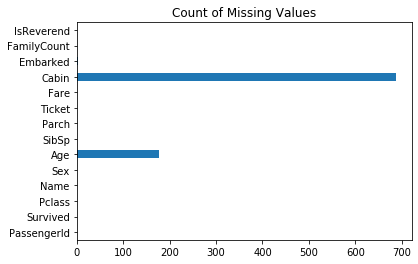

In [9]:
df.isnull().sum().plot(kind='barh')
plt.title('Count of Missing Values');

In [10]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
IsReverend       0
FamilyCount      0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
df.dropna(subset=['Embarked'], inplace=True)
df.shape

(889, 14)

In [12]:
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [13]:
df['FamilyCount'] = df['Parch'] + df['SibSp']

In [14]:
df['IsReverend'] = df['Name'].str.contains('Rev.').map(lambda x: int(x))

In [15]:
import numpy as np
np.unique(df['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [37]:
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [16]:
df['IsMale'] = df['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [17]:
df.drop('Sex', axis=1, inplace=True)

In [18]:
df['Title'] = [each.split(',')[1].split('.')[0].strip() for each in df['Name']]

In [22]:
np.unique(df['Title'] )

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [19]:
df.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [23]:
df['Survived'].mean()

0.38245219347581555

In [24]:
df.groupby('IsMale').mean()[['Survived']]

,Survived
IsMale,
0,0.740385
1,0.188908


In [18]:
df.groupby('IsMale')['Survived'].mean()

IsMale
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [25]:
df.groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [18]:
df[df['IsReverend'] == 1][['Survived']]

,Survived
149,0
150,0
249,0
626,0
848,0
886,0


In [19]:
df.loc[df['IsReverend']==1,'Survived']

149    0
150    0
249    0
626    0
848    0
886    0
Name: Survived, dtype: int64

In [20]:
df[df['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean()

Survived    0.299854
dtype: float64

In [21]:
df[df['Age'].isnull()][['Survived']].mean()

Survived    0.293785
dtype: float64

In [22]:
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(col, ':')
    print(df[df[col] == 1][['Survived']].mean())
    print()

Embarked_C :
Survived    0.553571
dtype: float64

Embarked_Q :
Survived    0.38961
dtype: float64

Embarked_S :
Survived    0.336957
dtype: float64



In [23]:
df[df['Age'] < 12].groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.750000
2,1.000000
3,0.404255


In [24]:
df[df['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,0,0,0,1,1,Capt


In [25]:
df[df['Survived'] == 0].sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,0,0,0,1,1,Mr
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,0,0,0,1,1,Mr
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,0,1,0,0,1,Mr
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,0,1,0,0,1,Mr
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,0,0,0,1,1,Mr


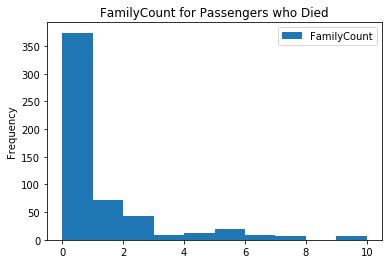

In [42]:
df[df['Survived'] == 0][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Died');

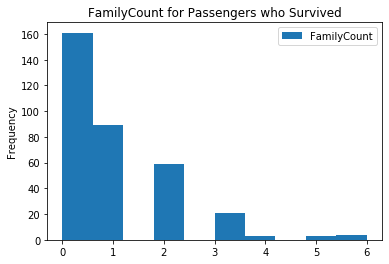

In [43]:
df[df['Survived'] == 1][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Survived');

In [48]:
df.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


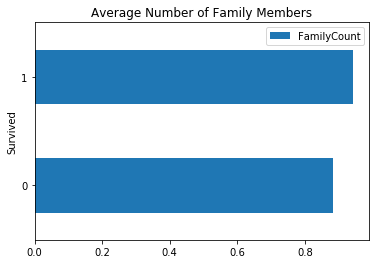

In [49]:
df.groupby('Survived').mean()[['FamilyCount']].plot(kind='barh')
plt.title('Average Number of Family Members');

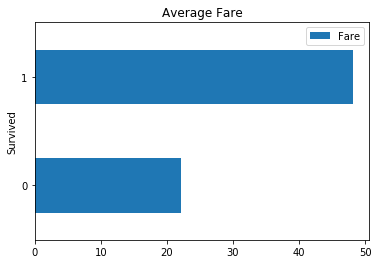

In [50]:
df.groupby('Survived').mean()[['Fare']].plot(kind='barh')
plt.title('Average Fare');

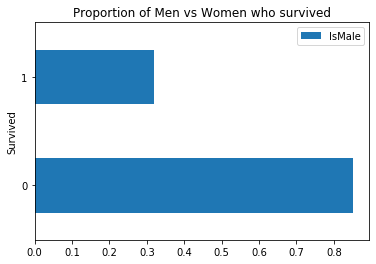

In [51]:
df.groupby('Survived').mean()[['IsMale']].plot(kind='barh')
plt.title('Proportion of Men vs Women who survived');

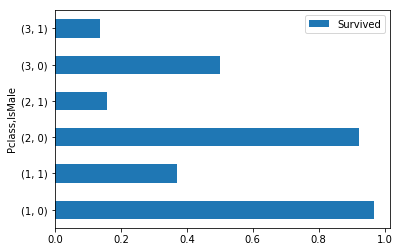

In [31]:
df.groupby(['Pclass', 'IsMale']).mean()[['Survived']].plot(kind='barh')